In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integ
import scipy.special as sf
import matplotlib as mpl
from astropy.io import ascii
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)


In [2]:
%run Fraunhofer.py

In [3]:

def filter_annulus(screen, A, k_in, k_out): #  4. consider normalization after fft & ifft 6. only consider real(WN)? 6. what k? 
    """
    k_in, k_out: filter radius in the fourier space
    A = amplitude of error mask"""
    N = screen['N']
    k = screen['kap'] # radius in k space
    
    # white noise
    WN = np.random.normal(0,1,(N,N))
    WN_FT = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(WN)))
    #filter
    cut1 = np.where(k<k_in, 0, 1)
    cut2 = np.where(k>k_out, 0, 1)
    WN_FT_fil = WN_FT*cut1*cut2 # filtered WN in fourier space
    WN_fil = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(WN_FT_fil)))) # filtered WN in real space
    screen['E'] = (1 + A*WN_fil) * screen['E']
    return(WN_FT_fil) #return amplitude
    

def filter_annulus_phase(screen, B, k_in, k_out):
    N = screen['N']
    k = screen['kap']
    WN = np.random.normal(0,1,(N,N))
    WN_FT = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(WN)))
    cut1 = np.where(k<k_in, 0, 1)
    cut2 = np.where(k>k_out, 0, 1)
    WN_FT_fil = WN_FT*cut1*cut2 # filtered WN in fourier space
    WN_fil = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(WN_FT_fil)))) # filtered WN in real space
    E_complex = screen['E']*np.exp(1j*B*WN_fil) 
    #screen['E'] = np.sqrt(np.real(E_complex**2) + np.imag(E_complex)**2)
    screen['E'] = E_complex
    #print(np.imag(E_complex)[500])
    return(B*WN_fil) 
    

def filter_WN(screen, A, k_in, k_out):
    """
    k_in, k_out: filter radius in the fourier space
    A = amplitude of error mask"""
    N = screen['N']
    k = screen['kap'] # radius in k space
    
    # white noise
    WN = np.random.normal(0,1,(N,N))
    WN_FT = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(WN)))
    #filter
    cut1 = np.where(k<k_in, 0, 1)
    cut2 = np.where(k>k_out, 0, 1)
    WN_FT_fil = WN_FT*cut1*cut2 # filtered WN in fourier space
    WN_fil = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(WN_FT_fil))) # filtered WN in real space
    return(WN_fil)
    
def rms(error_map):
    return np.sqrt(np.mean(error_map**2))

In [4]:
def Plane_wave(k,size,A,theta):
  """A = amplitude
  theta = angle in radians"""
  x = np.linspace(0, 10, size)
  y = np.linspace(0, 10, size)
  [xx,yy] = np.meshgrid(x,y)
  kx = k * np.cos(theta)
  ky = k * np.sin(theta)
  plane_wave = A*np.sin(kx*xx + ky*yy)
  #plane_wave += plane_wave.max() # offset
  return(plane_wave)

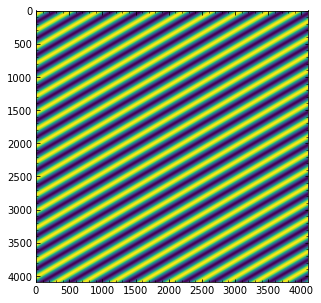

In [ ]:
#plt.imshow(Plane_wave(3,100,1,np.pi/3))
plt.imshow(Plane_wave(12,screen['N'],0.5,np.pi/3))

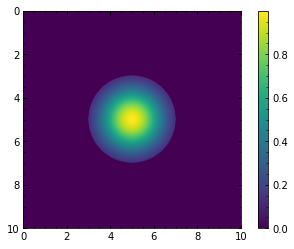

In [5]:
A = 1
screen0 = {}
screen0['N'] = 4096
screen0['D'] = 10
Initialize(screen0)
center = (screen0['D']/2, screen0['D']/2)
MultByGaussian(screen0, center, 1.0)
InCircle(screen0, center, 2.0)
ScreenFFT(screen0)
plt.imshow(screen0['E'],extent=(0, screen0['D'], screen0['D'], 0))
plt.colorbar()

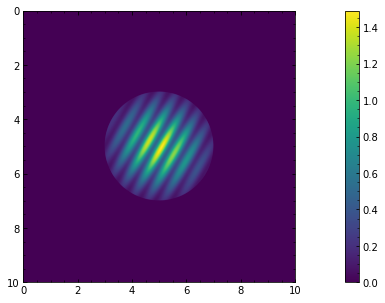

In [12]:
# amplitude
A = 1
screen = {}
screen['N'] = 4096
screen['D'] = 10
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, 1.0)
InCircle(screen, center, 2.0)
pw = Plane_wave(12,screen['N'],0.5,np.pi/6) #plane wave 
screen['E'] = (1 + A*pw ) * screen['E']
ScreenFFT(screen)
plt.imshow(screen['E'],extent=(0, screen['D'], screen['D'], 0))
plt.colorbar()

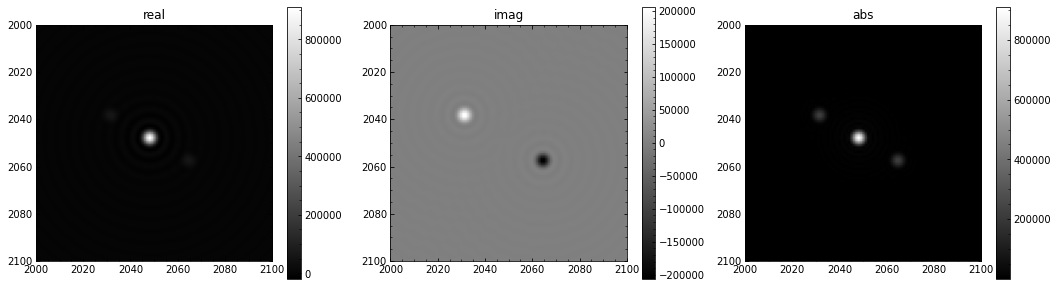

In [18]:
plt.rcParams['figure.figsize'] = [18, 5]
plt.subplot(1,3,1)
fft = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(screen['E'])))
plt.imshow(np.real(fft))
# plt.xlim(424,600)
# plt.ylim(424,600)
plt.xlim(2000,2100)
plt.ylim(2100,2000) #order is reversed for y
plt.title('real')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.imag(fft))
# plt.xlim(424,600)
# plt.ylim(424,600)
plt.xlim(2000,2100)
plt.ylim(2100,2000)
plt.title('imag')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(fft))
#plt.xlim(424,600)
#plt.ylim(424,600)
plt.xlim(2000,2100)
plt.ylim(2100,2000)
plt.title('abs')
plt.colorbar()

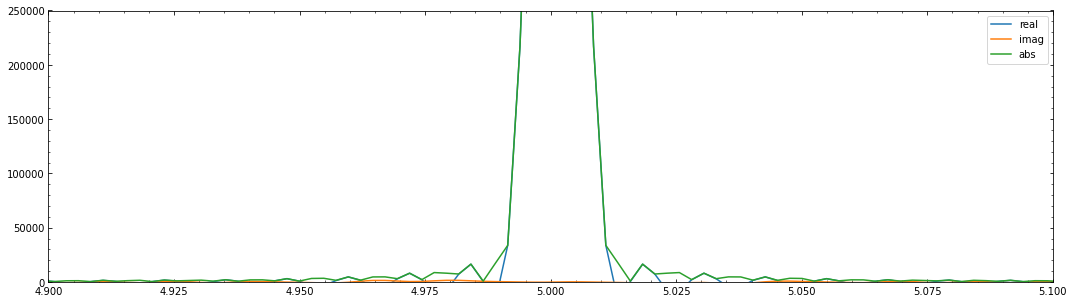

In [ ]:
# for theta=0
plt.plot(screen['X'][0], np.real(fft[2048]),label='real')
plt.plot(screen['X'][0], np.imag(fft[2048]),label='imag')
plt.plot(screen['X'][0], np.abs(fft[2048]),label='abs')
plt.xlim(4.9,5.1)
plt.ylim(-2.5e2,2.5e5)
plt.legend();

(2000.0, 2100.0)

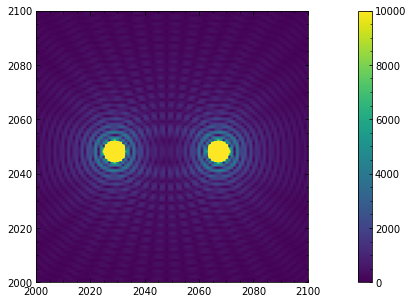

In [ ]:
fft0 = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(screen0['E'])))
plt.imshow(np.abs(fft0-fft),vmax=1e4)
plt.colorbar()
plt.xlim(2000,2100)
plt.ylim(2000,2100)

zoom in on y lim (-1e3, 1e3): see many oscillations: caused by the airy function due to our circular cut. changing the radius of our circular truncation changes the frequency of oscillations.

to see these oscillations smoothly, incease the number of pixels.

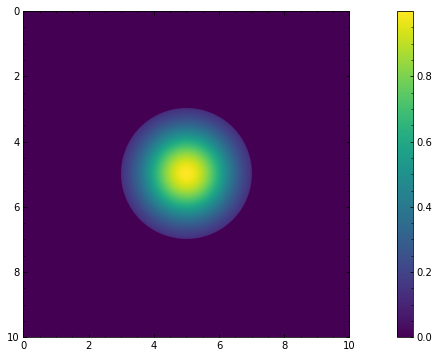

In [ ]:
# phase (a single k)
B = 10
screen1 = {}
screen1['N'] = 4096
screen1['D'] = 10
Initialize(screen1)
center = (screen1['D']/2, screen1['D']/2)
MultByGaussian(screen1, center, 1.0)
InCircle(screen1, center, 2.0)
pw = Plane_wave(12,screen1['N'],0.5,0) #plane wave 
E_comp = screen1['E']*np.exp(1j*B*pw) 
ScreenFFT(screen1)
plt.imshow(np.abs(E_comp),extent=(0, screen1['D'], screen1['D'], 0))
plt.colorbar()

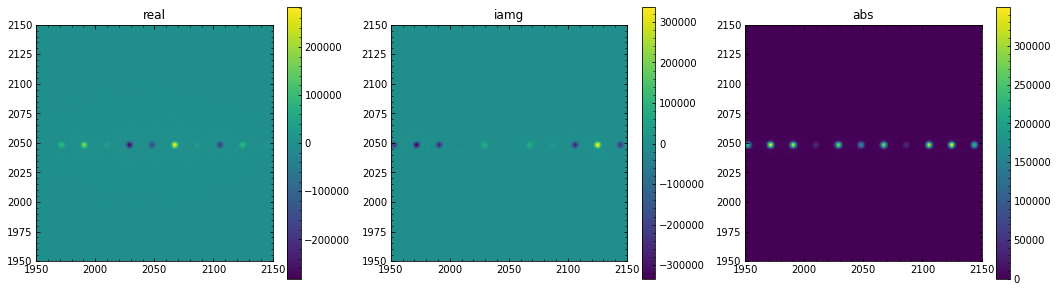

In [ ]:
plt.rcParams['figure.figsize'] = [18, 5]
plt.subplot(1,3,1)
fft1 = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(E_comp)))
plt.imshow(np.real(fft1))
plt.xlim(1950,2150)
plt.ylim(1950,2150)
plt.title('real')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.imag(fft1))
# plt.xlim(424,600)
# plt.ylim(424,600)
plt.xlim(1950,2150)
plt.ylim(1950,2150)
plt.title('iamg')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(fft1))
# plt.xlim(424,600)
# plt.ylim(424,600)
plt.xlim(1950,2150)
plt.ylim(1950,2150)
plt.title('abs')
plt.colorbar()

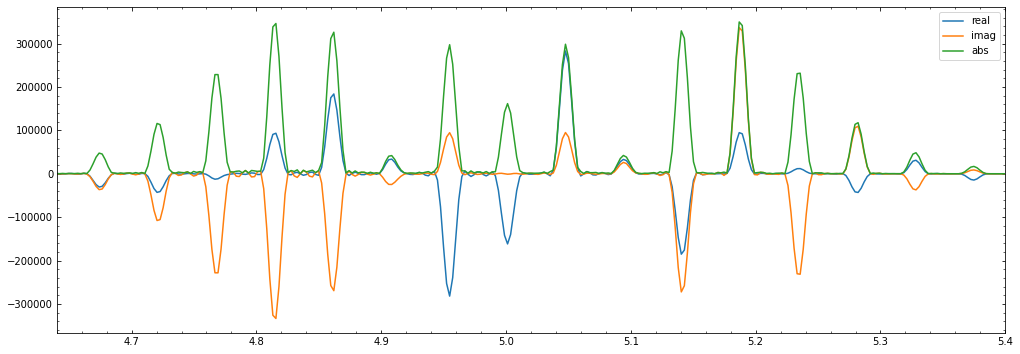

In [ ]:
# for theta=0
plt.rcParams['figure.figsize'] = [17, 6]
plt.plot(screen1['X'][0], np.real(fft1[2048]),label='real')
plt.plot(screen1['X'][0], np.imag(fft1[2048]),label='imag')
plt.plot(screen1['X'][0], np.abs(fft1[2048]),label='abs')
plt.xlim(4.64,5.4)
#plt.ylim(-8e3,8e3)
plt.legend();

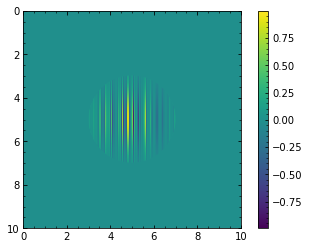

In [ ]:
# phase (multiple k's)
B = 10
screen2 = {}
screen2['N'] = 4096
screen2['D'] = 10
Initialize(screen2)
center = (screen2['D']/2, screen2['D']/2)
MultByGaussian(screen2, center, 1.0)
InCircle(screen2, center, 2.0)
pw1 = Plane_wave(12,screen2['N'],1.5,0) #plane wave 
pw2 = Plane_wave(10,screen2['N'],0.3,0)
pw3 = Plane_wave(11,screen2['N'],0.4,0)
E_comp2 = screen2['E'] * np.exp(1j*B*pw1) * np.exp(1j*B*pw2) * np.exp(1j*B*pw3)
ScreenFFT(screen2)
plt.imshow(np.real(E_comp2),extent=(0, screen2['D'], screen2['D'], 0))
plt.colorbar()

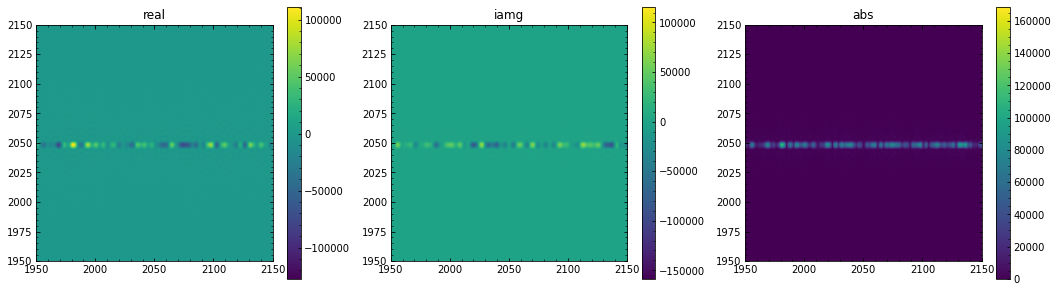

In [ ]:
plt.rcParams['figure.figsize'] = [18, 5]
plt.subplot(1,3,1)
fft2 = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(E_comp2)))
plt.imshow(np.real(fft2))
plt.xlim(1950,2150)
plt.ylim(1950,2150)
plt.title('real')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.imag(fft2))
# plt.xlim(424,600)
# plt.ylim(424,600)
plt.xlim(1950,2150)
plt.ylim(1950,2150)
plt.title('iamg')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.abs(fft2))
# plt.xlim(424,600)
# plt.ylim(424,600)
plt.xlim(1950,2150)
plt.ylim(1950,2150)
plt.title('abs')
plt.colorbar()

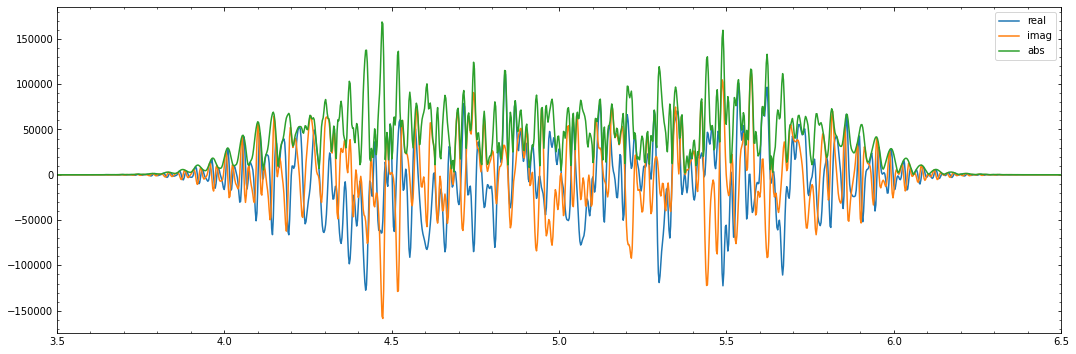

In [ ]:
# for theta=0
plt.rcParams['figure.figsize'] = [18, 6]
plt.plot(screen2['X'][0], np.real(fft2[2048]),label='real')
plt.plot(screen2['X'][0], np.imag(fft2[2048]),label='imag')
plt.plot(screen2['X'][0], np.abs(fft2[2048]),label='abs')
plt.xlim(3.5,6.5)
#plt.ylim(-8e3,8e3)
plt.legend();

the number of peaks seems to be related to the difference between plane wave amplitudes: 

3 plane waves with amplitude (1.5,0.4,0.3) show 5 apparent side peaks, compare to amplitude (0.5,0.4,0.3) which only show 3 side peaks. 

But fixing the amplitude and varying the phase error amplitude B don't seem to change anything but the strength. 

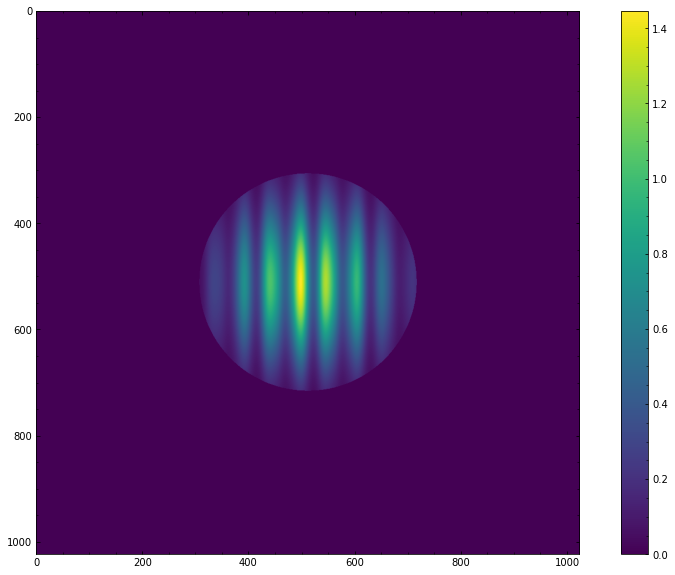

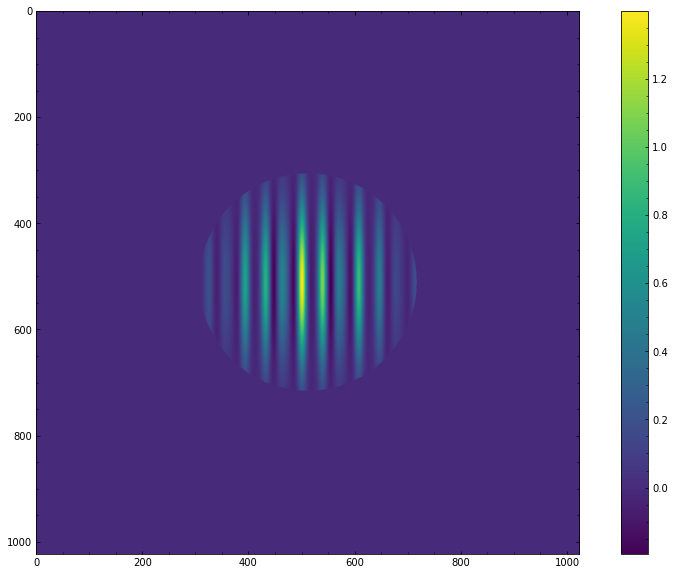

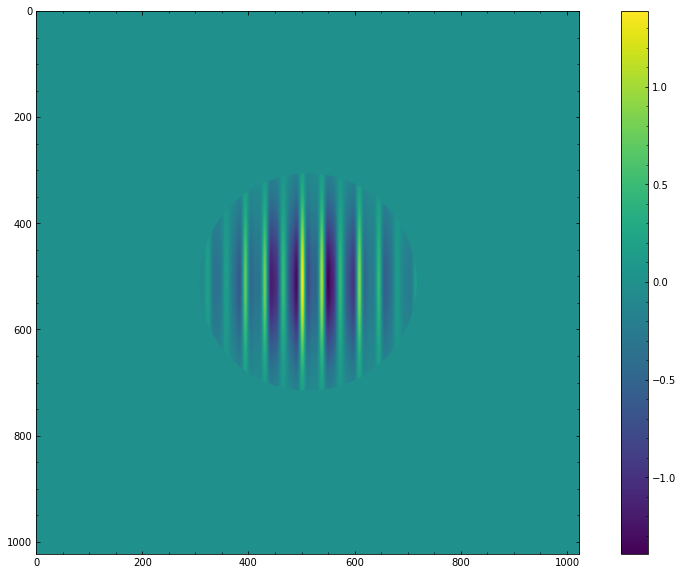

In [ ]:
# phase (arange number of plane waves) at theta=0

B = 1
N = screen2['N']
# input number of plane waves 
N_pw = np.arange(1,4) # 1, 2, 3, plane waves
for i in N_pw:
  pw = []
  screeni = {}
  name = '{i}'
  screeni['N'] = 100
  screeni['D'] = 10
  Initialize(screeni)
  center = (screeni['D']/2, screeni['D']/2)
  MultByGaussian(screeni, center, 1.0)
  InCircle(screeni, center, 2.0)
  for j in range(i):
    A_j = np.abs(np.random.normal(0,1)) # generate a random amplitude of a plane wave centered at 0, std=1
    k_j = np.abs(np.random.normal(11,1)) # generate a random k of a plane wave centered at 11, std=1
    pw_j = Plane_wave(k_j,screeni['N'],A_j,0)
    screen['E'] = screen['E'] * np.exp(1j*B*pw_j)
    if j == i:
      break
  ScreenFFT(screeni)
  plt.imshow(np.real(screen['E']))
  plt.colorbar()
  plt.show()
  plt.savefig('/home/gemma/Error/wave_{}.png'.format(i))

    

# pw1 = Plane_wave(12,screen2['N'],1.5,0) #plane wave 
# pw2 = Plane_wave(10,screen2['N'],0.3,0)
# pw3 = Plane_wave(11,screen2['N'],0.4,0)
# E_comp2 = screen2['E'] * np.exp(1j*pw1) * np.exp(1j*pw2) * np.exp(1j*pw3)
# ScreenFFT(screen2)
# plt.imshow(np.real(E_comp2),extent=(0, screen2['D'], screen2['D'], 0))
# plt.colorbar()

In [ ]:
b = 10**np.linspace(-1,2,6)
print(b)

[  0.1          0.39810717   1.58489319   6.30957344  25.11886432
 100.        ]


12/05 FT test of a phase shift by sin(x)

In [ ]:
def gausssian_phase(x,k,sigma,A,B):
  f = A * np.exp(-x**2/sigma**2) * np.exp(1j*B*np.sin(k*x))
  return(f)

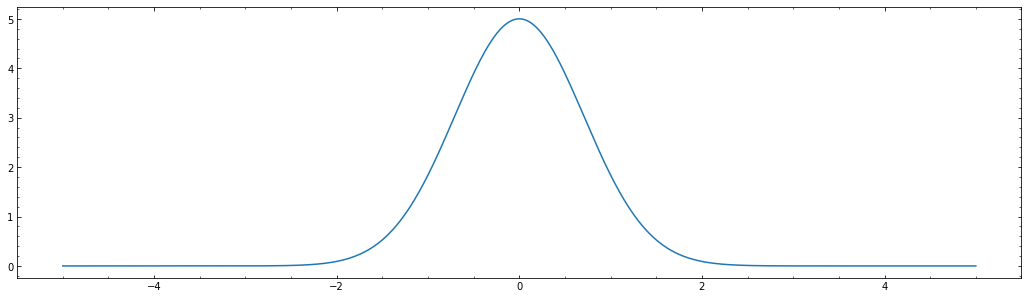

(-1.0, 1.0)

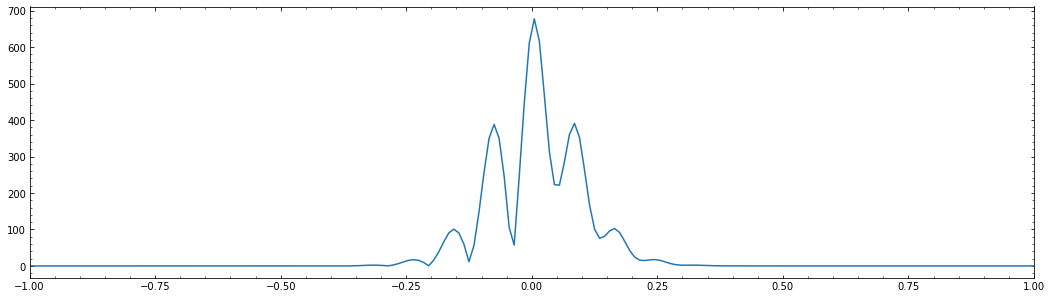

In [ ]:
x = np.linspace(-5,5,1000)
plot = gausssian_phase(x,5,1,5,1)
plot_fft = np.fft.fftshift(np.fft.fft(np.fft.fftshift(plot)))
plt.plot(x,np.abs(plot))
plt.show()
plt.plot(x,np.abs(plot_fft))
plt.xlim(-1,1)